In [7]:
from PIL import Image

In [8]:
path = '../images/dog.jpg'

In [9]:
image = Image.open(path)

In [10]:
# 이미지 포맷 알기 
image.format

'JPEG'

In [8]:
# 이미지 저장
image.save('backup.jpg')

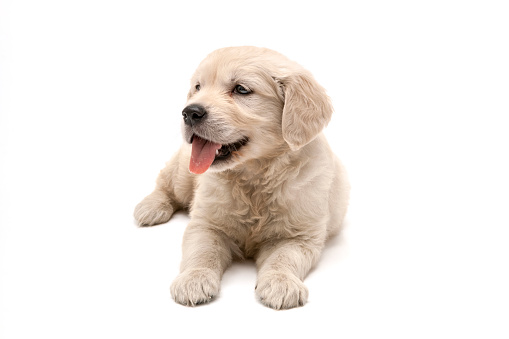

In [10]:
image

In [11]:
# 새로운 창을 띄어서 보여주는 방법 
image.show()

In [12]:
# 이미지 사이즈 (shape) 확인
image.size

(509, 339)

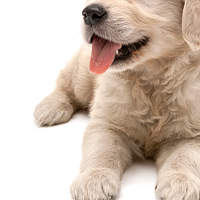

In [13]:
# Cropping 하기 
cropped_image = image.crop((100, 100, 300, 300))
cropped_image

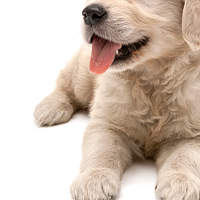

In [14]:
cropped_image

In [15]:
image.size

(509, 339)

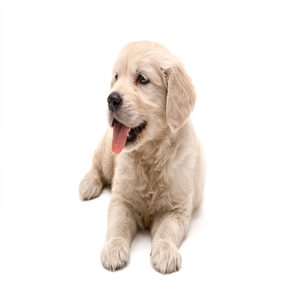

In [16]:
# 이미지 사이즈 바꾸기 
image.resize((300, 300))

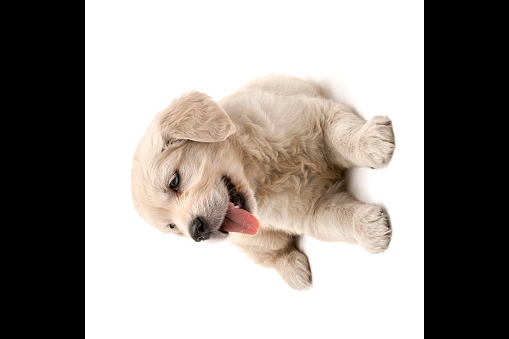

In [17]:
# 이미지 돌리기 
image.rotate(90)

In [18]:
image.rotate(90).size

(509, 339)

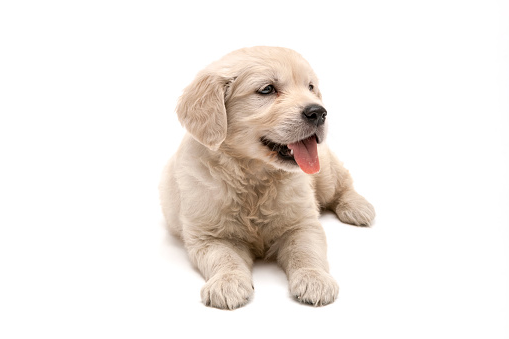

In [29]:
# 이미지 뒤집기 
# 0 : 좌우 
# 1 : 상하 
image.transpose(0)

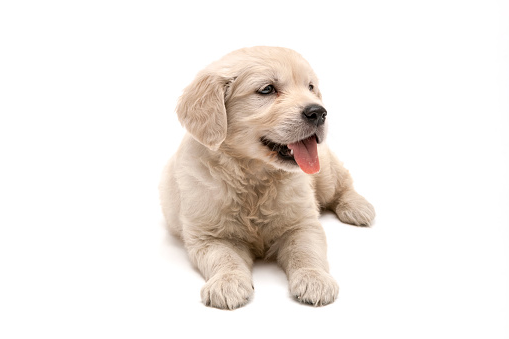

In [30]:
image.transpose(Image.FLIP_LEFT_RIGHT)

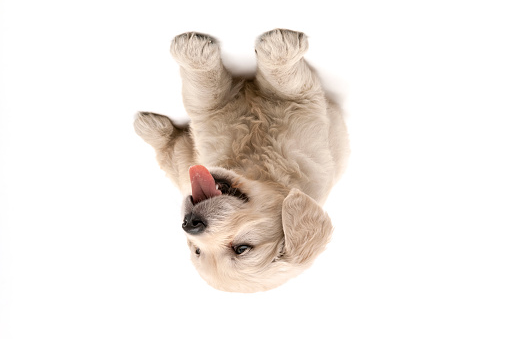

In [32]:
image.transpose(Image.FLIP_TOP_BOTTOM)

# Image Transformation

In [45]:
from PIL import ImageOps, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

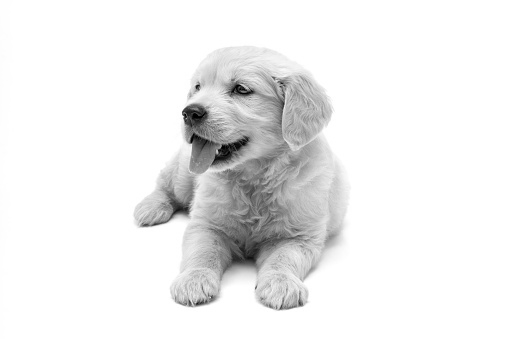

In [21]:
# 흑백으로 바꾸기 
image.convert("L")

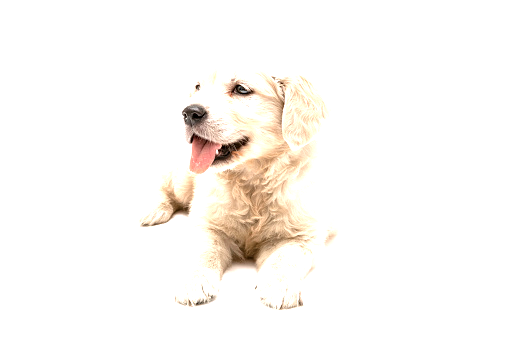

In [59]:
# Brightness 전체적인 밝기 조절 
enhancer = ImageEnhance.Brightness(image)
brighter_image = enhancer.enhance(1.5)
brighter_image

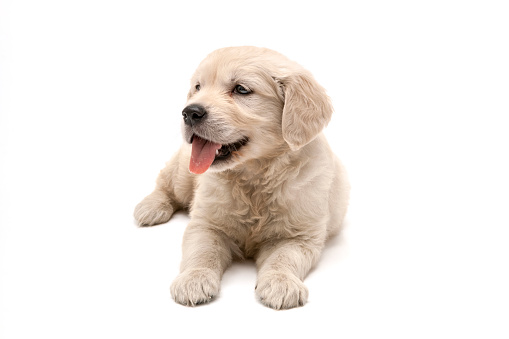

In [35]:
image

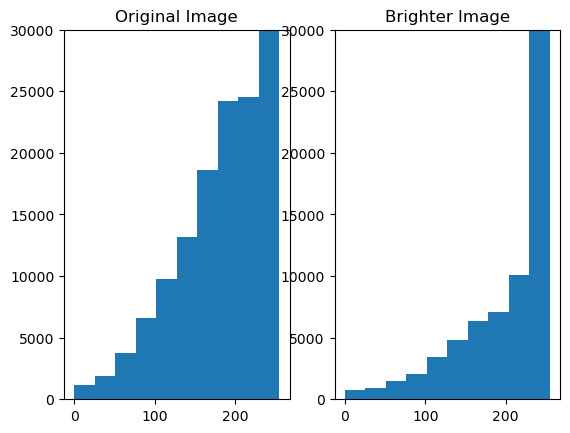

In [72]:
plt.subplot(121)
plt.hist(np.array(image).reshape(-1))
plt.title("Original Image")
plt.ylim(0, 30000)
plt.subplot(122)
plt.hist(np.array(brighter_image).reshape(-1))
plt.title("Brighter Image")
plt.ylim(0, 30000)
plt.show()

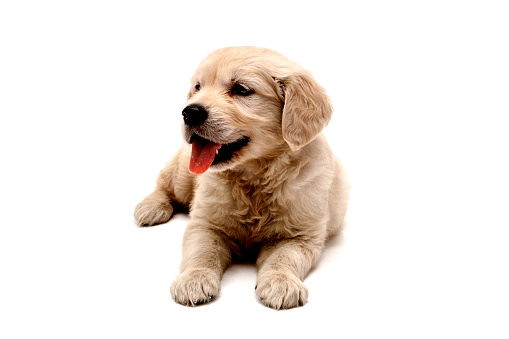

In [37]:
# Contrast : Contrast는 이미지의 밝은 부분과 어두운 부분의 차이를 의미하고, 
# 이를 조절한다는 것은 이미지의 밝은 부분과 어두운부분의 차이를 조절


enhancer = ImageEnhance.Contrast(image)
contrast_image = enhancer.enhance(1.5)
contrast_image

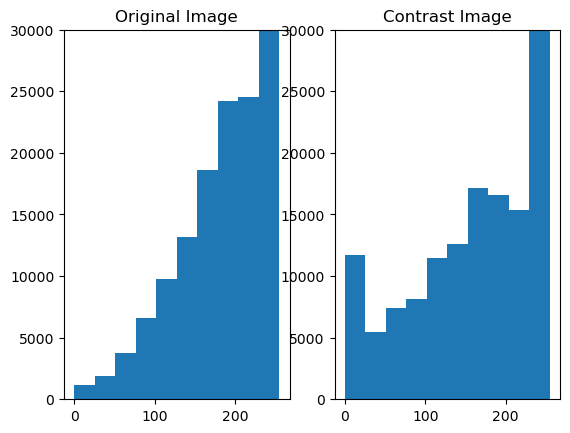

In [71]:
plt.subplot(121)
plt.hist(np.array(image).reshape(-1))
plt.title("Original Image")
plt.ylim(0, 30000)
plt.subplot(122)
plt.hist(np.array(contrast_image).reshape(-1))
plt.title("Contrast Image")
plt.ylim(0, 30000)
plt.show()

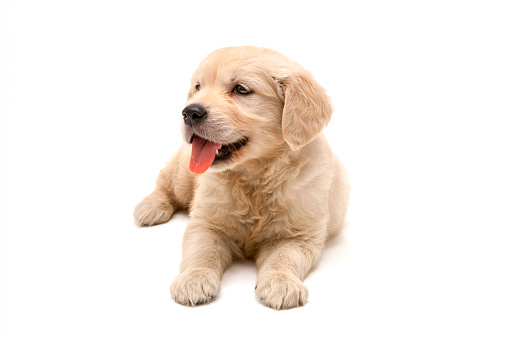

In [62]:
# Saturation 채도 : 색의 선명 정도를 의미,
# 순색은 채도가 가장 높은 색상으로, 선명하고 강한 느낌이며 순색에 무채색을 섞으면 채도가 낮아짐 

enhancer = ImageEnhance.Color(image)
saturated_image = enhancer.enhance(1.5)  # Increase saturation by 50%
saturated_image

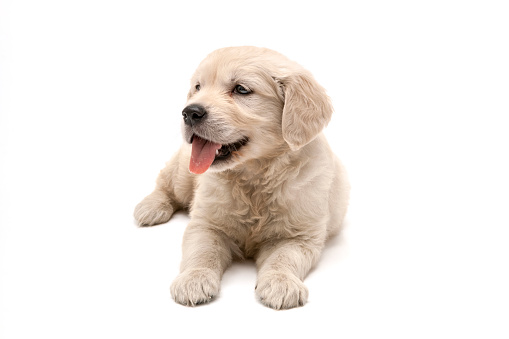

In [63]:
image

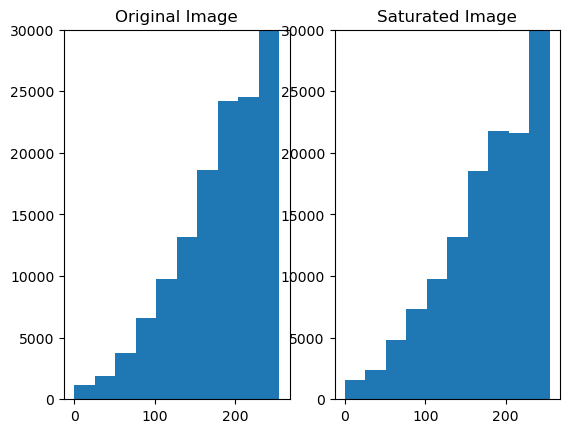

In [70]:
plt.subplot(121)
plt.hist(np.array(image).reshape(-1))
plt.title("Original Image")
plt.ylim(0, 30000)
plt.subplot(122)
plt.hist(np.array(saturated_image).reshape(-1))
plt.title("Saturated Image")
plt.ylim(0, 30000)
plt.show()

# Filter

이미지의 여러 필터 사용

In [74]:
from PIL import ImageFilter, ImageEnhance

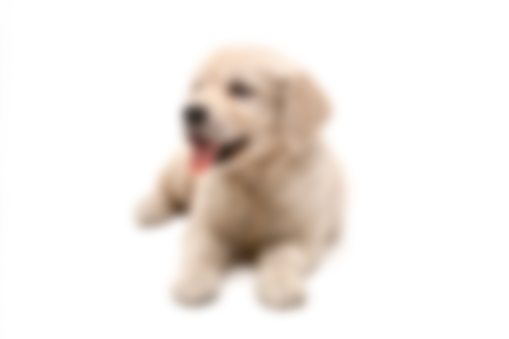

In [76]:
blurred_image = image.filter(ImageFilter.GaussianBlur(radius=5))
blurred_image

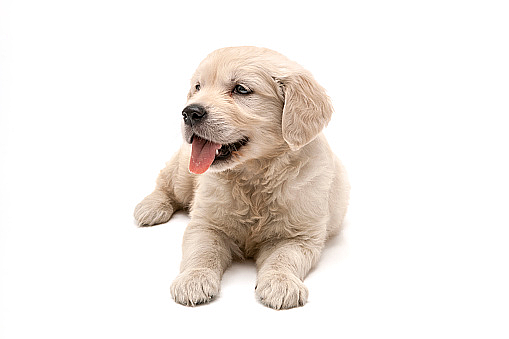

In [77]:
sharpened_image = image.filter(ImageFilter.SHARPEN)
sharpened_image

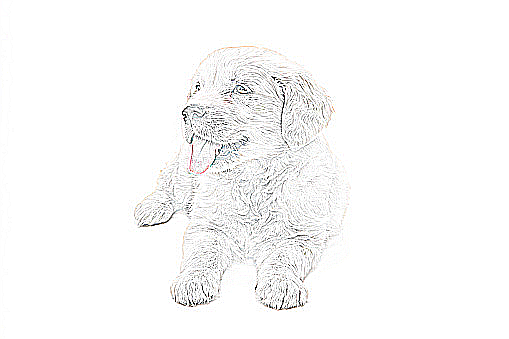

In [78]:
contour_image = image.filter(ImageFilter.CONTOUR)
contour_image

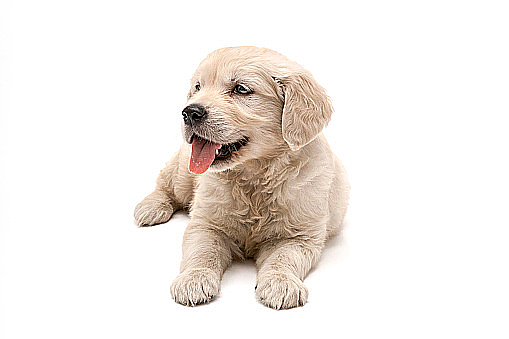

In [80]:
enhancer = ImageEnhance.Sharpness(image)
sharper_image = enhancer.enhance(5.0)
sharper_image

# Image Composition

In [81]:
from PIL import ImageOps, ImageDraw, ImageFilter

In [138]:
fg_path = '../images/dog.jpg'
bg_path = '../images/background.jpg'

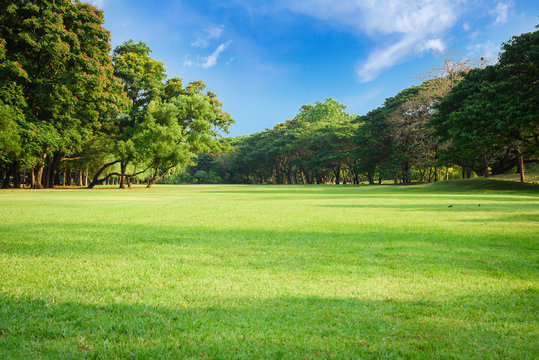

In [139]:
dog = Image.open(fg_path)
background = Image.open(bg_path)
background

In [140]:
background = background.convert("RGBA")
dog = dog.convert("RGBA")

In [141]:
dog.size, background.size

((509, 339), (539, 360))

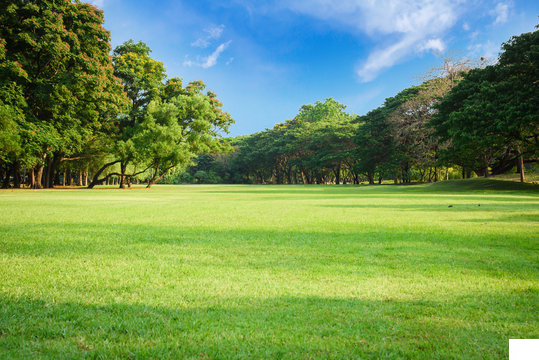

In [144]:
x, y = dog.size
background.paste(dog, (x, y), dog)  # Paste the foreground image at (x, y) position
background
# image.paste(background, (x, y), background)  # Paste the foreground image at (x, y) position

In [145]:
blend_image = Image.blend(background, dog.resize(x, y), 0.5)  # alpha: (0 to 1)
blend_image.show()

ValueError: Unknown resampling filter (339). Use Image.Resampling.NEAREST (0), Image.Resampling.LANCZOS (1), Image.Resampling.BILINEAR (2), Image.Resampling.BICUBIC (3), Image.Resampling.BOX (4) or Image.Resampling.HAMMING (5)